In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf

In [3]:
data = pd.read_csv(r'train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [6]:
data.drop('Id', axis=1, inplace=True)

In [7]:
data.MSSubClass = data.MSSubClass.astype(str) # MSSubClass

In [8]:
def loss_rate(x):  # x is DataFrmae type
    table = ((x.isnull().sum()) /
             x.shape[0]).sort_values(ascending=False).map(lambda i:"{:.2%}".format(i))
    return table

In [9]:
data.LotFrontage.fillna(data.LotFrontage.mean(), inplace=True)  # mean value fill

In [10]:
data.drop(data[data.Electrical.isna()].index, inplace=True)

In [11]:
data.MasVnrType.value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [12]:
data.MasVnrType = data.MasVnrType.fillna('None')  # mode value fill

In [13]:
data.MasVnrArea.fillna(data.MasVnrArea.mean(), inplace=True)  # mean value fill

In [14]:
data.drop(data[data.BsmtQual.isna()].index, inplace=True)

In [15]:
data.drop(data[data.BsmtFinType1.isna()].index, inplace=True)

In [16]:
data.drop(data[data.BsmtExposure.isna()].index, inplace=True)

In [17]:
data.drop(data[data.BsmtFinType2.isna()].index, inplace=True)

In [18]:
data.drop(data[data.GarageYrBlt.isna()].index, inplace=True)

In [53]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,-0.254916,-0.219483,Pave,None,Reg,Lvl,AllPub,Inside,...,-0.071556,None,None,None,-0.084282,-1.604232,0.145874,WD,Normal,208500
1,20,RL,0.422530,-0.108069,Pave,None,Reg,Lvl,AllPub,FR2,...,-0.071556,None,None,None,-0.084282,-0.494244,-0.606409,WD,Normal,181500
2,60,RL,-0.119427,0.051786,Pave,None,IR1,Lvl,AllPub,Inside,...,-0.071556,None,None,None,-0.084282,0.985739,0.145874,WD,Normal,223500
3,70,RL,-0.480732,-0.112913,Pave,None,IR1,Lvl,AllPub,Corner,...,-0.071556,None,None,None,-0.084282,-1.604232,-1.358692,WD,Abnorml,140000
4,60,RL,0.603183,0.343400,Pave,None,IR1,Lvl,AllPub,FR2,...,-0.071556,None,None,None,-0.084282,2.095727,0.145874,WD,Normal,250000


In [55]:
data.to_csv('prepared_data.csv', index=False)

<AxesSubplot:>

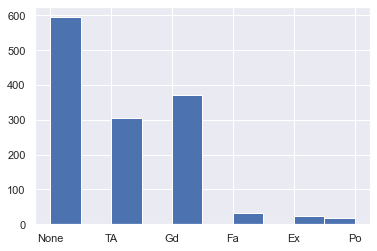

In [138]:
data.FireplaceQu.hist()

In [20]:
data.PoolQC = data.PoolQC.fillna('None')

In [21]:
data.MiscFeature = data.MiscFeature.fillna('None')

In [22]:
data.Alley = data.Alley.fillna('None')

In [23]:
data.Fence = data.Fence.fillna('None')

In [24]:
data.FireplaceQu = data.FireplaceQu.fillna('None')

In [25]:
loss_rate(data)[:8]

MSSubClass      0.00%
MSZoning        0.00%
GarageYrBlt     0.00%
GarageType      0.00%
FireplaceQu     0.00%
Fireplaces      0.00%
Functional      0.00%
TotRmsAbvGrd    0.00%
dtype: object

In [26]:
num_list = list(data.select_dtypes('number'))

In [27]:
num_list.remove('SalePrice')

In [28]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [79]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [80]:
data[num_list] = std.fit_transform(data[num_list])

In [81]:
new_data_x = pd.get_dummies(data).drop('SalePrice', axis=1)

In [82]:
new_data_y = pd.get_dummies(data)['SalePrice']

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(new_data_x, new_data_y, train_size=0.8)

In [85]:
x_train.shape

(1076, 302)

In [86]:
x_valid.shape

(270, 302)

In [87]:
x_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
875,0.196715,-0.166198,1.338335,-0.549472,1.144191,1.047310,-0.596381,-0.875034,-0.295297,1.222617,...,0,1,0,0,0,0,0,0,0,1
1402,-0.300079,-0.383019,0.583981,-0.549472,1.110357,0.997998,-0.596381,-1.014373,-0.295297,1.600268,...,0,1,0,0,0,0,0,0,0,1
406,-0.887200,-0.022813,-0.170374,-0.549472,-1.258009,-1.763468,-0.596381,-1.014373,-0.295297,1.095217,...,0,0,0,1,0,0,0,0,1,0
600,0.151552,0.020493,1.338335,-0.549472,1.076524,0.948686,0.917263,0.174363,-0.295297,-0.160586,...,0,0,0,1,0,0,0,0,1,0
835,-0.480732,-0.108069,-1.679084,1.306461,-0.784336,0.455567,-0.596381,-0.052063,-0.295297,0.096490,...,0,0,0,1,0,0,0,0,1,0


In [88]:
np.array(x_train)

array([[ 0.19671489, -0.16619791,  1.33833544, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30007935, -0.38301918,  0.58398054, ...,  0.        ,
         0.        ,  1.        ],
       [-0.88719982, -0.02281298, -0.17037436, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.97752604,  0.43989407,  1.33833544, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.10638867, -0.17346404,  1.33833544, ...,  0.        ,
         1.        ,  0.        ],
       [-0.4807318 ,  0.45229493,  0.58398054, ...,  0.        ,
         1.        ,  0.        ]])

<AxesSubplot:>

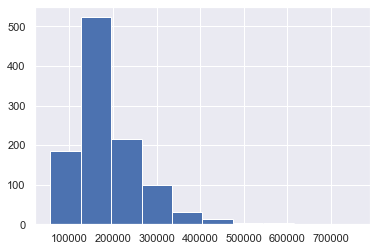

In [137]:
y_train.hist()

In [89]:
print(x_train.shape, y_train.shape)

(1076, 302) (1076,)


In [142]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=x_train.shape[1:]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1),
])
# model.summary 可以显示出网络结构的具体信息
model.summary()
# 编译模型， 损失函数为均方误差函数，优化函数为随机梯度下降
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adadelta())
# 回调函数使用了EarlyStopping，patience设为5， 阈值设置为1e-2
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               90900     
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 171,301
Trainable params: 171,301
Non-trainable params: 0
_________________________________________________________________


In [145]:
history = model.fit(x_train, y_train, 
                    epochs=1000, validation_data=(x_valid, y_valid), callbacks=callbacks)

Epoch 1/1000
34/34 [==============================] - 0s 3ms/step - loss: 988612544.0000 - val_loss: 1023731200.0000
Epoch 2/1000
34/34 [==============================] - 0s 4ms/step - loss: 988490432.0000 - val_loss: 1023729216.0000
Epoch 3/1000
34/34 [==============================] - 0s 4ms/step - loss: 988357632.0000 - val_loss: 1023716736.0000
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 988248832.0000 - val_loss: 1023709184.0000
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 988135616.0000 - val_loss: 1023731776.0000
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 987996416.0000 - val_loss: 1023720960.0000
Epoch 7/1000
34/34 [==============================] - 0s 4ms/step - loss: 987878848.0000 - val_loss: 1023701056.0000
Epoch 8/1000
34/34 [==============================] - 0s 4ms/step - loss: 987735616.0000 - val_loss: 1023694272.0000
Epoch 9/1000
34/34 [==============================] - 0s 4ms/ste

<AxesSubplot:>

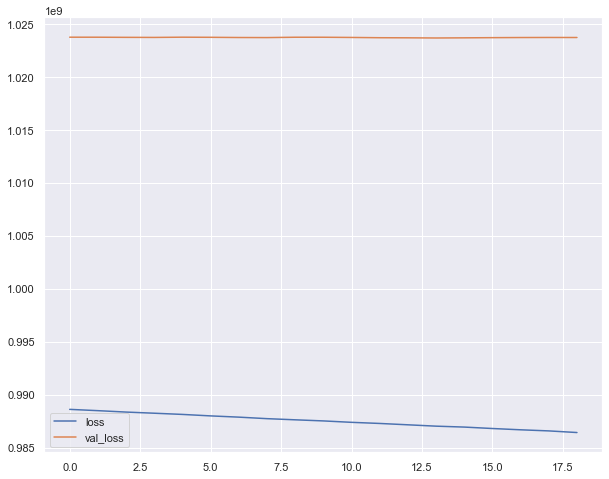

In [146]:
import seaborn as sns
sns.set()
pd.DataFrame(history.history).plot(figsize=(10,8))

# 后面过程需要重新调整，测试集应与训练集组成一致

In [255]:
test = pd.read_csv('test.csv')

In [256]:
test.drop('Id', axis=1, inplace=True)

In [ ]:
import missingno as msno
msno.matrix(test, labels=True)

<AxesSubplot:>

In [ ]:
test.MSSubClass = test.MSSubClass.astype(str)
test.LotFrontage.fillna(test.LotFrontage.mean(), inplace=True)

In [ ]:
test.Alley = test.Alley.fillna('None')

In [ ]:
loss_rate(test)[:10]

In [ ]:
test.PoolQC = test.PoolQC.fillna('None')

In [209]:
test.MiscFeature.fillna('None', inplace=True)

In [211]:
test.Fence.fillna('None', inplace=True)

In [217]:
test.FireplaceQu.fillna(test.FireplaceQu.mode().values[0], inplace=True)

In [218]:
test.KitchenQual.fillna(test.KitchenQual.mode().values[0], inplace=True)

In [221]:
for i in ['BsmtFinSF2', 'TotalBsmtSF', 'Exterior2nd', 'Exterior1st', 'BsmtFinSF1', 'GarageCars']:
    test[i].fillna(test[i].mode().values[0], inplace=True)

In [232]:
for i in ['BsmtUnfSF', 'GarageArea', 'SaleType', 'Utilities', 'BsmtFullBath', 'Functional']:
    test[i].fillna(test[i].mode().values[0], inplace=True)

In [236]:
for i in ['BsmtHalfBath', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'BsmtFinType1', 'BsmtFinType2']:
    test[i].fillna(test[i].mode().values[0], inplace=True)

In [239]:
for i in ['BsmtQual', 'BsmtExposure', 'BsmtCond', 'GarageType', 'GarageYrBlt', 'GarageQual']:
    test[i].fillna(test[i].mode().values[0], inplace=True)

In [241]:
for i in ['GarageCond', 'GarageFinish']:
    test[i].fillna(test[i].mode().values[0], inplace=True)

In [246]:
num_list = list(test.select_dtypes('number'))

In [248]:
test[num_list] = std.fit_transform(test[num_list])

In [249]:
test = pd.get_dummies(test)

In [254]:
for i in list(test):
    if i not in list(x_train):
        print(i)

MSSubClass_150
Exterior1st_AsphShn
ExterCond_Po
Foundation_Slab
Heating_Wall


In [250]:
test.shape

(1459, 289)

In [243]:
price = model.predict(test)